# Gamma-hurdle parameter estimation

Until present, we have been estimating the parameters of the gamma-hurdle distribution as follows. Suppose we observe $x \equiv \{x_1, ..., x_n\}$, draws from a gamma-hurdle distribution. 

$$x_{nz} \equiv \{x_i | x_i \in x, x_i > 0\}$$

$$\hat\lambda = \frac{|x_{nz}|}{n}$$

$$\hat\beta = \frac{<x_{nz}>}{<x^2_{nz}> - <x_{nz}>^2}$$

$$\hat\alpha = \frac{<x_{nz}>^2}{<x^2_{nz}> - <x_{nz}>^2}$$

This method is very computationally favorable, as it requires only the sum, sum of squares, `n`, and `nnz` to estimate all three parameters. These estimates were determined by matching mean and variance to those of a gamma distribution given certain parameters, rather than by a more standard method.

A standard way to estimate the parameters of statistical distributions given observations is maximum likelihood estimation (MLE). Using MLE, we obtain the same estimate for $\hat\lambda$ and the same relationship between $\hat\alpha$ and $\hat\beta$ (that is, $\hat\alpha = \hat\beta <x_{nz}>$), but a different estimate for $\beta$ itself. The MLE estimates are as follows

$$s \equiv \log \bigg(<x_{nz}>\bigg) - < \log(x_{nz}) >$$

$$\hat\alpha \approx \frac{3 - s + \sqrt{(s-3)^2 + 24s}}{12s}$$

$$\hat\beta \approx \frac{3 - s + \sqrt{(s-3)^2 + 24s}}{12s <x_{nz}>}$$

This notebook attempts to determine whether our moment-matching estimates are similar to the MLE estimates.

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
a_list = list()
b_list = list()
a_mles = list()
b_mles = list()
a_matches = list()
b_matches = list()

for a, b in itertools.product(np.linspace(0.02, 3, 500), np.linspace(0.01, 3, 10)):
    draws = np.random.gamma(shape=a, scale=1/b, size=100000)
    s = np.log(np.mean(draws)) - np.mean(np.log(draws))
    a_mle = (3 - s + ((s - 3)**2 + 24 * s) ** 0.5) / (12 * s)
    b_mle = a_mle / np.mean(draws)
    a_match = np.mean(draws)**2 / np.std(draws)**2
    b_match = a_match / np.mean(draws)
    
    a_list.append(a)
    b_list.append(b)
    a_mles.append(a_mle)
    b_mles.append(b_mle)
    a_matches.append(a_match)
    b_matches.append(b_match)

df = pd.DataFrame.from_dict({'a': a_list, 'b': b_list, 'a_mle': a_mles, 'b_mle': b_mles, 
                             'a_match': a_matches, 'b_match': b_matches})

Text(0,0.5,'Moment-matching estimate')

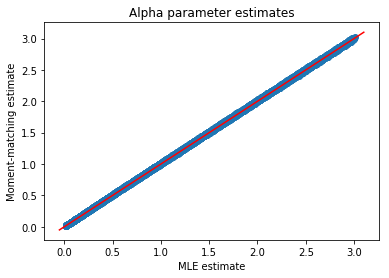

In [3]:
plt.scatter(df['a_mle'], df['a_match'])
plt.plot([-0.05,3.1], [-0.05,3.1], c='r')
plt.title("Alpha parameter estimates")
plt.xlabel('MLE estimate')
plt.ylabel('Moment-matching estimate')

Text(0,0.5,'Moment-matching estimate')

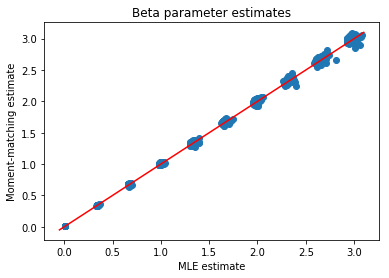

In [4]:
plt.scatter(df['b_mle'], df['b_match'])
plt.plot([-0.05,3.1], [-0.05,3.1], c='r')
plt.title("Beta parameter estimates")
plt.xlabel('MLE estimate')
plt.ylabel('Moment-matching estimate')